In [1]:
from langdetect import detect

In [2]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

#### Remove the bots from these 5001 users

In [6]:
Filtered_filenames_set = set(filenames)

file2 = open("bots_removed.txt","r+")  
bot_List = file2.readlines()
print(len(bot_List))
for name in bot_List:
    name = name.strip()
    full_name = name+"_tweet_only.csv"
    if full_name in Filtered_filenames_set:
        #print("yes")
        Filtered_filenames_set.remove(name+"_tweet_only.csv")
    
Filtered_filenames = list(Filtered_filenames_set)

151


In [3]:
import pandas as pd
import time
from collections import defaultdict
import multiprocessing

In [20]:
import pickle
import matplotlib.pyplot as plt

In [4]:
### Read the .pkl files you are done scanning.
import pickle
pkl_file = open('Famous_Users/User_Data/ListsReturned/MentionedBack_1.pkl', 'rb')
returnedLists = pickle.load(pkl_file)
pkl_file.close()
pkl_file = open('Famous_Users/User_Data/ListsReturned/MentionedBack_2.pkl', 'rb')
returnedLists_2 = pickle.load(pkl_file)
pkl_file.close()
pkl_file = open('Famous_Users/User_Data/ListsReturned/MentionedBack_3.pkl', 'rb')
returnedLists_3 = pickle.load(pkl_file)
pkl_file.close()
pkl_file = open('Famous_Users/User_Data/ListsReturned/MentionedBack_4.pkl', 'rb')
returnedLists_4 = pickle.load(pkl_file)
pkl_file.close()
pkl_file = open('Famous_Users/User_Data/ListsReturned/MentionedBack_5.pkl', 'rb')
returnedLists_5 = pickle.load(pkl_file)
pkl_file.close()


In [5]:
returnedLists = returnedLists + returnedLists_2 + returnedLists_3 + returnedLists_4 + returnedLists_5 #+ returnedLists_6

In [7]:
number_of_processes = 67
total_tweets_scanned = 0
total_tweets_with_foreign_languages = 0
total_tweets_with_no_languages = 0
List_of_englishFractionTuples = []
List_of_User_LangDict_dictionaries = []
for i in range(number_of_processes):
    List_of_User_LangDict_dictionaries.append(returnedLists[i][0])
    total_tweets_scanned += returnedLists[i][1]
    total_tweets_with_foreign_languages += returnedLists[i][2]
    total_tweets_with_no_languages += returnedLists[i][3]
    List_of_englishFractionTuples += returnedLists[i][4] 

In [10]:
# get the users who mentioned back.
mentioned_df = pd.read_csv('Famous_Users/mentionedBack_users.csv')
mentionedbackUsers = list(mentioned_df['Mentionedback Usernames'])
print(len(mentionedbackUsers))
print(len(List_of_englishFractionTuples))
count=0
List_of_englishFractionTuples_2 = List_of_englishFractionTuples
List_of_englishFractionTuples = []
for eachtuple in List_of_englishFractionTuples_2:
    if eachtuple[0] in mentionedbackUsers:
        List_of_englishFractionTuples.append(eachtuple)
        count+=1
        
print(count)
print(len(List_of_englishFractionTuples))

676
579
479
479


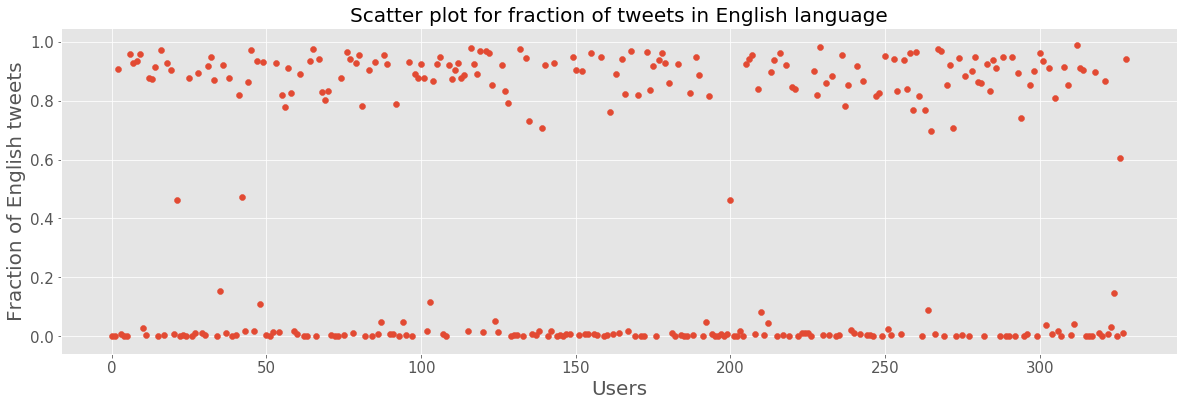

In [102]:
fig = plt.figure(figsize=(20,6)) 
plt.style.use('ggplot')
#ticks = [i for i in range(0, length+1, length/25)]
#plt.xticks(ticks)
x_values = [i for i in range(329)]
plt.scatter(x_values, englishFractions_List)
plt.xlabel("Users",fontsize = 20)
plt.ylabel("Fraction of English tweets",fontsize = 20)
plt.title("Scatter plot for fraction of tweets in English language", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.savefig('ListsReturned/MentionedBack/English_ScatterPlot_DidnotMentionBackUsers.png')
plt.savefig('Famous_Users/MentionedBack_Users/English_ScatterPlot_MentionBackUsers.png')
plt.show()

In [39]:
sorted_englishFrequencies = sorted(englishFractions_List)

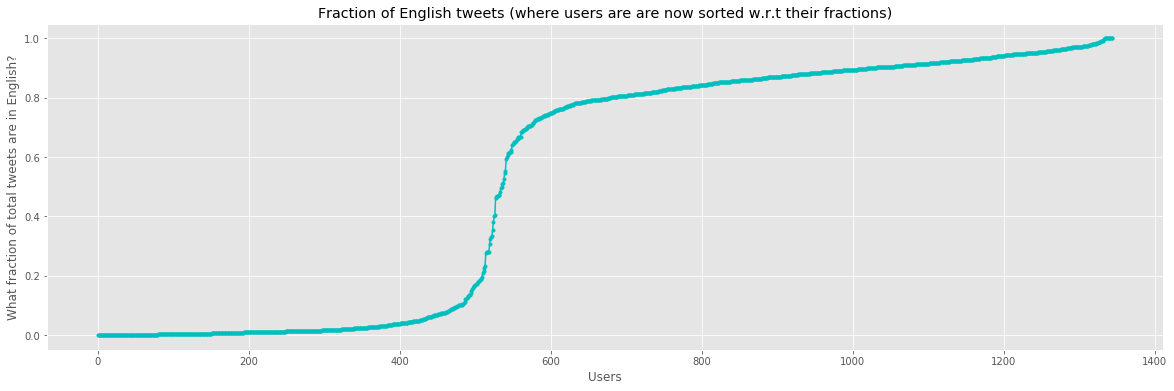

In [14]:
fig = plt.figure(figsize=(20,6)) 
plt.style.use('ggplot')

plt.plot(x_values, sorted_englishFrequencies,'co-', markersize = 3)
plt.xlabel("Users")
plt.ylabel("What fraction of total tweets are in English?")
plt.title("Fraction of English tweets (where users are are now sorted w.r.t their fractions)")
plt.savefig('ListsReturned/DidNotMentionBack/English_SortedPlot_MentionedBackUsers.png')
plt.show()

In [56]:
sorted_englishFrequencies[::-1]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9974313069199034,
 0.9946462421230596,
 0.9939520818795069,
 0.9922913292090318,
 0.9910668708524758,
 0.9900018178512998,
 0.9898259261015985,
 0.9897435897435898,
 0.989397022598265,
 0.9889274858879722,
 0.9886291378342996,
 0.9875051208521098,
 0.9870980165607549,
 0.9863508417866058,
 0.986099433888235,
 0.9858490566037735,
 0.9855276759703036,
 0.9853237872484779,
 0.9851664254703328,
 0.9831189710610932,
 0.9828431372549019,
 0.9826446673957492,
 0.9823801270941652,
 0.9819424665337511,
 0.9819391634980988,
 0.9817351598173516,
 0.9814279520161873,
 0.9808988764044944,
 0.9804941482444733,
 0.9804496578690127,
 0.9803495426967309,
 0.9795592036884044,
 0.979448247814004,
 0.9790381625796098,
 0.9783493599197688,
 0.9782774053174365,
 0.9773239000757649,
 0.9768934531450578,
 0.9766745131607104,
 0.975963153096963,
 0.9758558558558559,
 0.9754832626119755,
 0.97512860406

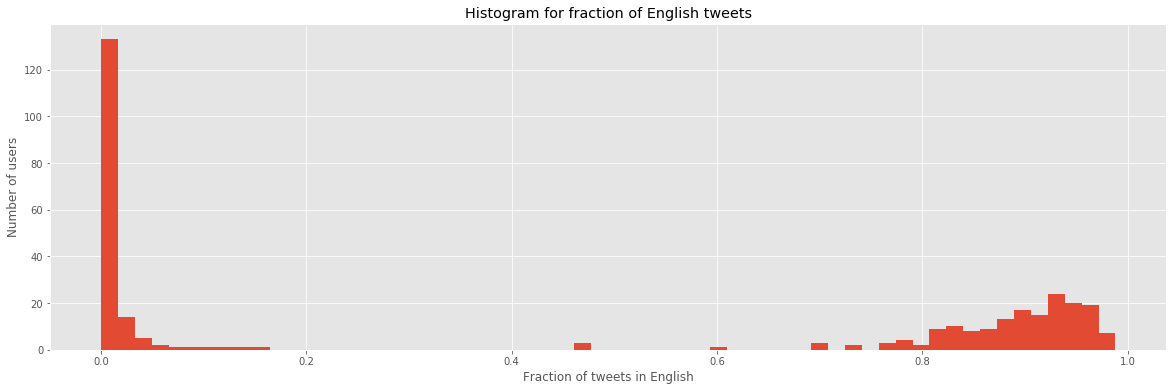

In [66]:
fig = plt.figure(figsize=(20,6)) 
plt.style.use('ggplot')

plt.hist(sorted_englishFrequencies, bins = 60)
plt.xlabel("Fraction of tweets in English")
plt.ylabel("Number of users")
plt.title("Histogram for fraction of English tweets")
#plt.savefig('ListsReturned/MentionedBack/English_Histogram_DidnotMentionBackUsers.png')
#plt.savefig('ListsReturned/English_Histogram_MentionBackUsers.png')
plt.savefig('Famous_Users/MentionedBack_Users/English_Histogram_MentionBackUsers.png')
plt.show()

In [40]:
## xaxis - fraction of total tweets that are in english
## yaxis - fraction (number/total count) of users with atleast x fraction of their tweets in english
import numpy as np
from collections import defaultdict


sorted_list = sorted(set((sorted_englishFrequencies)))
freqdict = defaultdict(int)
for k in sorted_englishFrequencies:
    freqdict[k]+=1
freqlist = []
for k in sorted_list:
    freqlist.append(freqdict[k])
    
freqcumsum = list(np.cumsum(np.array(freqlist)))

s = sum(freqlist)

ccdf = []
for i in range(1, len(freqcumsum)):
    ccdf.append(s-freqcumsum[i-1])
    
ccdf.insert(0, s)

In [41]:
numberofUsers = ccdf[0]
fractional_ccdf = []
for value in ccdf:
    fractional_ccdf.append(value/numberofUsers)

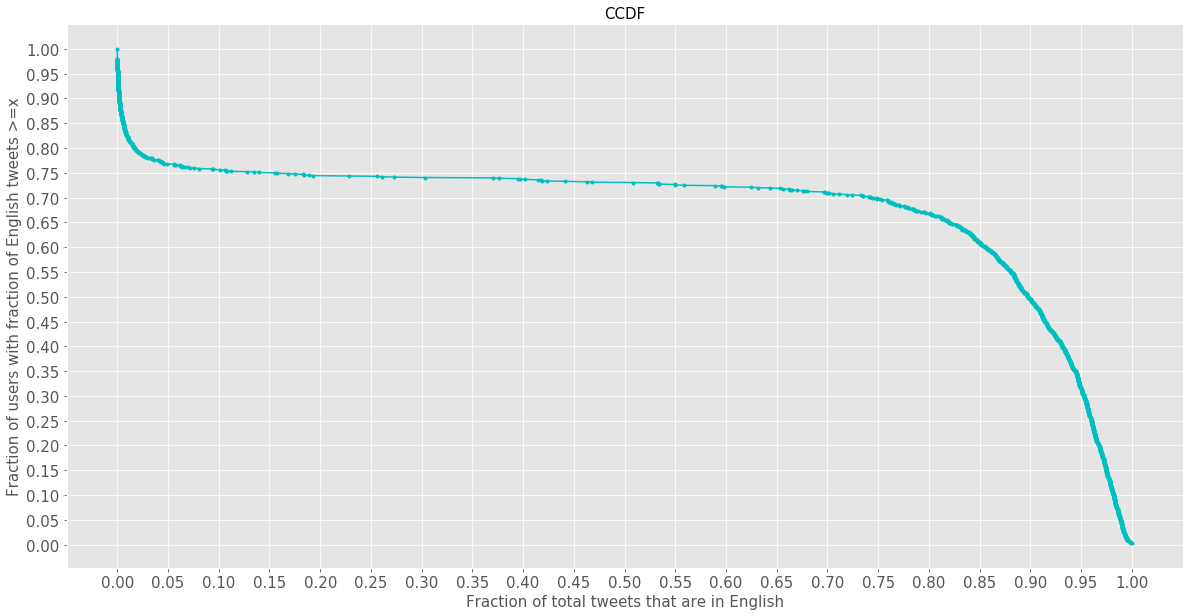

In [42]:
fig = plt.figure(figsize=(20,10)) 
plt.style.use('ggplot')
ticks = []
i = 0
while i<=1:
    ticks.append(i)
    i = i + 0.05
    i = round(i, 2)
plt.yticks(ticks)
plt.xticks(ticks)
plt.plot(sorted_list, fractional_ccdf,'co-', markersize = 3)
plt.xlabel("Fraction of total tweets that are in English", fontsize=15)
plt.ylabel("Fraction of users with fraction of English tweets >=x", fontsize=15)
plt.title("CCDF", fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#plt.savefig('ListsReturned/DidNotMentionBack/English_CCDF_DidnotMentionBackUsers.png')
#plt.savefig('ListsReturned/MentionedBack/English_CCDF_MentionBackUsers.png')
plt.savefig('Famous_Users/DidNotMentionBack_Users/English_CCDF_DidNotMentionBackUsers.png')
plt.show()

In [64]:
# We see that around 27% of total users have 75% or more of their total tweet in English.

In [43]:
## distribution of foreign languages tweet frequency.
from collections import defaultdict
Overall_languageCount_dict = defaultdict(int)
number_of_processes = 16
for i in range(number_of_processes):
    dict_values_list = list(returnedLists[i][0].values())
    for j in range(len(dict_values_list)):
        language_freq_for_aUser = dict_values_list[j]
        #print(language_freq_for_aUser,"\n")
        for key in list(language_freq_for_aUser.keys()):
            #print(key)
            Overall_languageCount_dict[key] += language_freq_for_aUser[key]
        #print(Overall_languageCount_dict)

In [45]:
language_xaxis_values = []
frequency_of_appearance = []
for w in sorted(Overall_languageCount_dict, key=Overall_languageCount_dict.get, reverse=True):
    print(w, Overall_languageCount_dict[w])
    language_xaxis_values.append(w)
    value = Overall_languageCount_dict[w]
    frequency_of_appearance.append(value)

en 2594705
ru 660957
mk 201993
de 129069
bg 46468
so 35201
fr 27803
af 24919
uk 22179
et 21684
cy 20764
sw 18403
nl 17270
tl 17159
it 15751
id 13773
no 12509
es 12069
da 11373
sv 10020
tr 9989
pt 9426
ca 9250
vi 8991
hr 8971
fi 6988
ro 6774
pl 6240
sl 4336
sq 3387
sk 2950
cs 2020
ja 1973
hu 1785
lt 1385
lv 869
ko 239
ar 105
zh-cn 58
el 30
he 12
ta 9
hi 8
ur 8
th 6
ne 5
fa 4
zh-tw 3
mr 1
pa 1
bn 1


['en', 'ru', 'mk', 'de', 'bg', 'so', 'fr', 'af', 'uk', 'et', 'cy', 'sw', 'nl', 'tl', 'it', 'id', 'no', 'es', 'da', 'sv', 'tr', 'pt', 'ca', 'vi', 'hr', 'fi', 'ro', 'pl', 'sl', 'sq', 'sk', 'cs', 'ja', 'hu', 'lt', 'lv', 'ko', 'ar', 'zh-cn', 'el', 'he', 'ta', 'hi', 'ur', 'th', 'ne', 'fa', 'zh-tw', 'mr', 'pa', 'bn']


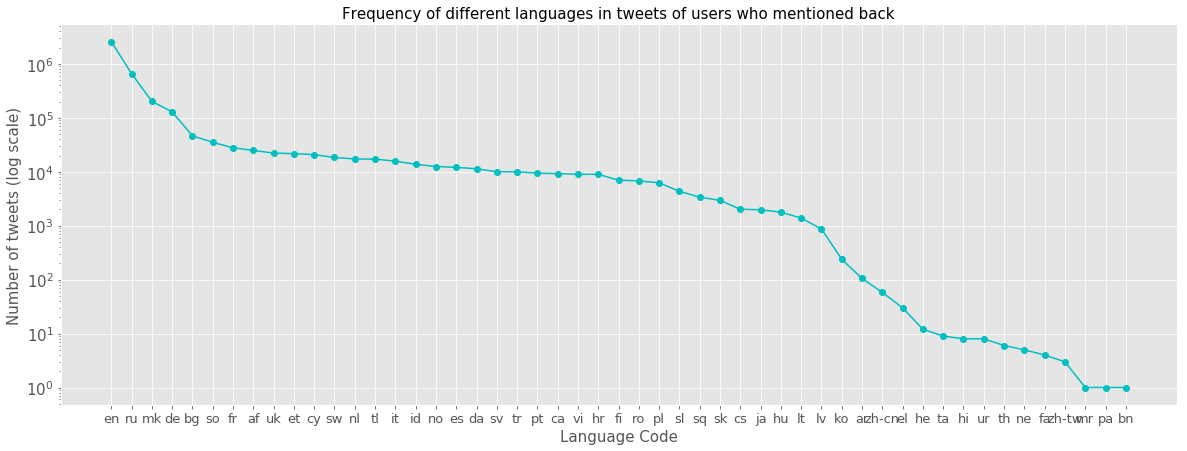

In [46]:
fig = plt.figure(figsize=(20,7)) 
plt.style.use('ggplot')
x = [i for i in range(51)] # range(total number of different languages found)
ticks = []
for value in language_xaxis_values:
    ticks.append(value)
print(ticks)
plt.xticks(x,ticks)
new_y = []
for y in frequency_of_appearance:
    new_y.append(y//1000000)
plt.plot(x, frequency_of_appearance, 'co-', markersize = 6)
plt.xlabel("Language Code",fontsize = 15)
plt.ylabel("Number of tweets (log scale)",fontsize = 15)
plt.yscale("log")
plt.title("Frequency of different languages in tweets of users who mentioned back",fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
#plt.savefig('ListsReturned/DidNotMentionBack/Tweet_Language_frequency_DidnotMentionBackUsers.png')
#plt.savefig('ListsReturned/MentionedBack/Tweet_Language_frequency_MentionBackUsers.png')
plt.savefig('Famous_Users/DidNotMentionBack_Users/Tweet_Language_frequency_DidNotMentionBackUsers.png')
plt.show()

In [48]:
Filtered_users = []
for eachtuple in List_of_englishFractionTuples:
    if eachtuple[1] >=0.75:
        Filtered_users.append(eachtuple[0])
        
print(len(Filtered_users))

889


In [50]:
import pandas as pd

Usernames = pd.DataFrame()
Usernames['Users'] = Filtered_users
Usernames.to_csv('Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers.csv', index=None)